In [106]:
# Gerekli kütüphaneleri içe aktarıyoruz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Görselleştirme için Matplotlib'in varsayılan stilini güncelleme
plt.style.use('ggplot')

# Uyarıları bastırmak için (isteğe bağlı)
import warnings
warnings.filterwarnings('ignore')

print("Gerekli kütüphaneler başarıyla yüklendi.")


Gerekli kütüphaneler başarıyla yüklendi.


In [107]:
# Veri setini yükleme
file_path = "/content/drive/MyDrive/Colab Notebooks/database/trafik_veri_analizi/futuristic_city_traffic.csv"  # Dosyanızın adı
data = pd.read_csv(file_path)

# Veri setinin ilk birkaç satırını görüntüleme
print("Veri setinin ilk 5 satırı:")
print(data.head())

# Veri setinin genel bilgileri
print("\nVeri seti hakkında genel bilgiler:")
print(data.info())

# Eksik değer kontrolü
print("\nVeri setindeki eksik değerlerin toplamı:")
print(data.isnull().sum())

#eğer eksik veri olsaydı
# Sayısal sütunlar için ortalama ile doldurma
# data['Speed'].fillna(data['Speed'].mean(), inplace=True)

# Kategorik sütunlar için en sık değer ile doldurma
# data['City'].fillna(data['City'].mode()[0], inplace=True)

# Tüm satırı silme: Eğer eksik veri çok azsa, ilgili satırları tamamen kaldırabiliriz.
# data.dropna(inplace=True)

# Belirli bir sütunu silme: Eksik veriler yalnızca belirli bir sütundaysa ve bu sütun analize katkı sağlamıyorsa kaldırılabilir.
# data.drop(columns=['Weather Conditions'], inplace=True)

# Eğer eksik veri analizin bir parçasıysa, özel bir etiket ekleyebiliriz.

# data['Economic Conditions'].fillna('Unknown', inplace=True)



Veri setinin ilk 5 satırı:
           City        Vehicle Type      Weather Economic Condition  \
0  SolarisVille               Drone        Snowy             Stable   
1      AquaCity          Flying Car  Solar Flare          Recession   
2     Neuroburg  Autonomous Vehicle  Solar Flare          Recession   
3     Ecoopolis               Drone        Clear            Booming   
4      AquaCity  Autonomous Vehicle  Solar Flare             Stable   

  Day Of Week  Hour Of Day     Speed  Is Peak Hour  Random Event Occurred  \
0      Sunday           20   29.4268             0                      0   
1   Wednesday            2  118.8000             0                      0   
2   Wednesday           16  100.3904             0                      0   
3    Thursday            8   76.8000             1                      0   
4    Saturday           16   45.2176             0                      0   

   Energy Consumption  Traffic Density  
0             14.7134           0.5241  
1

In [108]:
# Eksik değerlerin kontrolü
print("Eksik değerlerin toplamı:\n", data.isnull().sum())

# Eksik veri stratejisi uygulama
if data.isnull().sum().any():
    # Örnek: Sayısal sütunları ortalama ile doldur
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        data[col].fillna(data[col].mean(), inplace=True)

    # Örnek: Kategorik sütunları en sık değerle doldur
    cat_cols = data.select_dtypes(include=['object']).columns
    for col in cat_cols:
        data[col].fillna(data[col].mode()[0], inplace=True)

    print("\nEksik veriler dolduruldu.")
else:
    print("\nVeri setinde eksik veri bulunmuyor.")


Eksik değerlerin toplamı:
 City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

Veri setinde eksik veri bulunmuyor.


In [109]:
# Kategorik değişkenlerin benzersiz değerlerini kontrol etme
categorical_cols = data.select_dtypes(include=['object']).columns
print("Kategorik sütunlar ve benzersiz değerler:")
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")

# Örneğin, kategorik sütunları küçük harfe çevirerek standartlaştırma (isteğe bağlı)
for col in categorical_cols:
    data[col] = data[col].str.lower()

# Verilerin türlerini kontrol etme
print("\nVeri türlerini kontrol etme:")
print(data.dtypes)

# Sayısal sütunlarda anormal değerler var mı diye kontrol (örnek: hız veya enerji tüketimi için)
print("\nSpeed sütunundaki istatistikler:")
print(data['Speed'].describe())

print("\nEnergy Consumption sütunundaki istatistikler:")
print(data['Energy Consumption'].describe())

# Anormal değer kontrolü (örneğin negatif hız veya enerji değerleri)
print("\nNegatif değer kontrolü:")
print("Negatif hız sayısı:", (data['Speed'] < 0).sum())
print("Negatif enerji tüketimi sayısı:", (data['Energy Consumption'] < 0).sum())

# Negatif veya anormal değerler varsa temizleme
data = data[data['Speed'] >= 0]
data = data[data['Energy Consumption'] >= 0]

# Temizlenmiş veri setinin son kontrolü
print("\nTemizlenmiş veri setinin ilk 5 satırı:")
print(data.head())


Kategorik sütunlar ve benzersiz değerler:
City: ['SolarisVille' 'AquaCity' 'Neuroburg' 'Ecoopolis' 'TechHaven'
 'MetropolisX']
Vehicle Type: ['Drone' 'Flying Car' 'Autonomous Vehicle' 'Car']
Weather: ['Snowy' 'Solar Flare' 'Clear' 'Rainy' 'Electromagnetic Storm']
Economic Condition: ['Stable' 'Recession' 'Booming']
Day Of Week: ['Sunday' 'Wednesday' 'Thursday' 'Saturday' 'Monday' 'Friday' 'Tuesday']

Veri türlerini kontrol etme:
City                      object
Vehicle Type              object
Weather                   object
Economic Condition        object
Day Of Week               object
Hour Of Day                int64
Speed                    float64
Is Peak Hour               int64
Random Event Occurred      int64
Energy Consumption       float64
Traffic Density          float64
dtype: object

Speed sütunundaki istatistikler:
count    1.219567e+06
mean     5.994476e+01
std      2.663203e+01
min      6.693400e+00
25%      3.753310e+01
50%      5.847110e+01
75%      8.053455e+01
ma

In [110]:
# Veri setinin temel istatistiksel özeti
print("Veri setinin sayısal sütunlarına ilişkin temel istatistiksel özet:")
print(data.describe())

# Kategorik değişkenlerin frekans dağılımları
print("\nKategorik değişkenlerin frekans dağılımları:")
for col in categorical_cols:
    print(f"\n{col} sütununun frekans dağılımı:")
    print(data[col].value_counts())

# Saatlik trafik yoğunluğu analizi (örnek)
print("\nSaatlik trafik yoğunluğu istatistikleri:")
hourly_density = data.groupby('Hour Of Day')['Traffic Density'].mean()
print(hourly_density)

# Trafik yoğunluğu için pik saat analizi
peak_hour_density = data[data['Is Peak Hour'] == 1]['Traffic Density'].mean()
non_peak_hour_density = data[data['Is Peak Hour'] == 0]['Traffic Density'].mean()

print("\nPik saatlerde ortalama trafik yoğunluğu:", peak_hour_density)
print("Pik saat dışında ortalama trafik yoğunluğu:", non_peak_hour_density)


Veri setinin sayısal sütunlarına ilişkin temel istatistiksel özet:
        Hour Of Day         Speed  Is Peak Hour  Random Event Occurred  \
count  1.219567e+06  1.219567e+06  1.219567e+06           1.219567e+06   
mean   1.150817e+01  5.994476e+01  1.546992e-01           4.988738e-02   
std    6.919071e+00  2.663203e+01  3.616178e-01           2.177123e-01   
min    0.000000e+00  6.693400e+00  0.000000e+00           0.000000e+00   
25%    6.000000e+00  3.753310e+01  0.000000e+00           0.000000e+00   
50%    1.200000e+01  5.847110e+01  0.000000e+00           0.000000e+00   
75%    1.700000e+01  8.053455e+01  0.000000e+00           0.000000e+00   
max    2.300000e+01  1.630886e+02  1.000000e+00           1.000000e+00   

       Energy Consumption  Traffic Density  
count        1.219567e+06     1.219567e+06  
mean         4.946464e+01     2.770960e-01  
std          2.528014e+01     2.191019e-01  
min          4.929600e+00     5.900000e-03  
25%          2.927395e+01     1.059000e-0

In [111]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


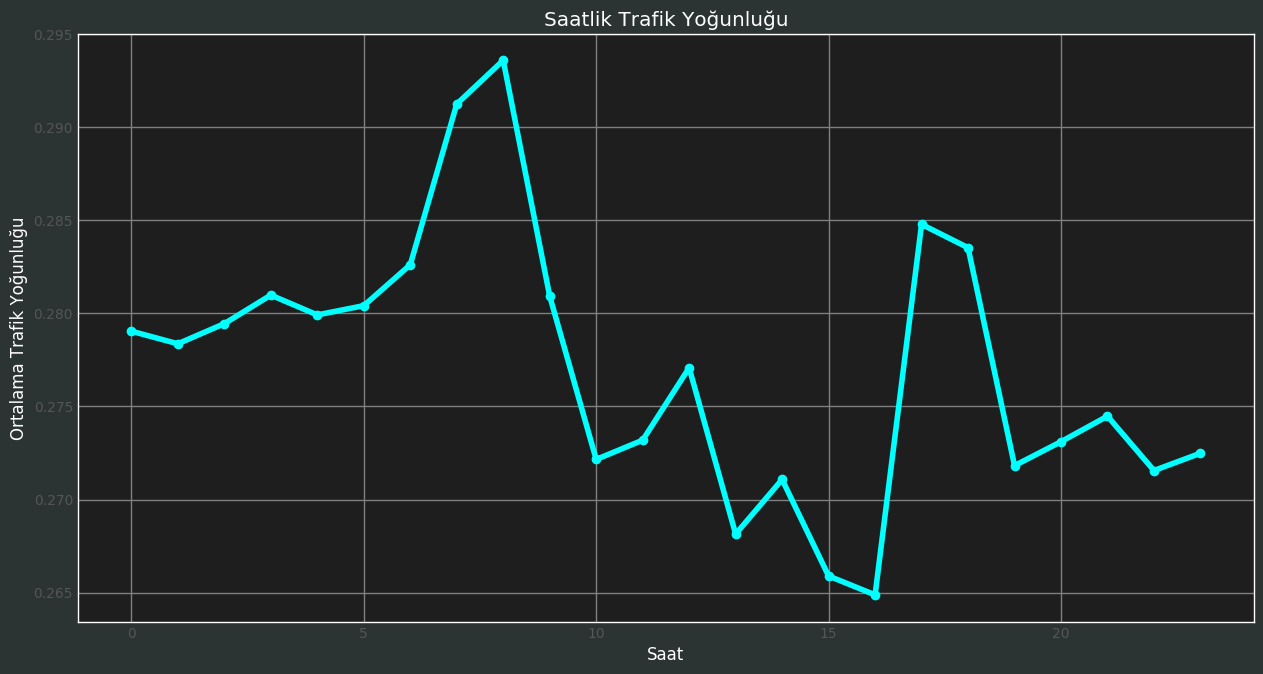

In [112]:
# Saatlik trafik yoğunluğunu görselleştirme
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#2B3333')  # Tüm figürün arka planını koyu gri yap
ax.set_facecolor('#1E1E1E')         # Grafik alanının arka planını koyu gri yap
hourly_density.plot(kind='line', marker='o', linestyle='-', color='cyan', ax=ax)
plt.title('Saatlik Trafik Yoğunluğu', color='white')  # Başlık rengini beyaz yap
plt.xlabel('Saat', color='white')
plt.ylabel('Ortalama Trafik Yoğunluğu', color='white')
plt.grid(True, color='gray')
plt.show()


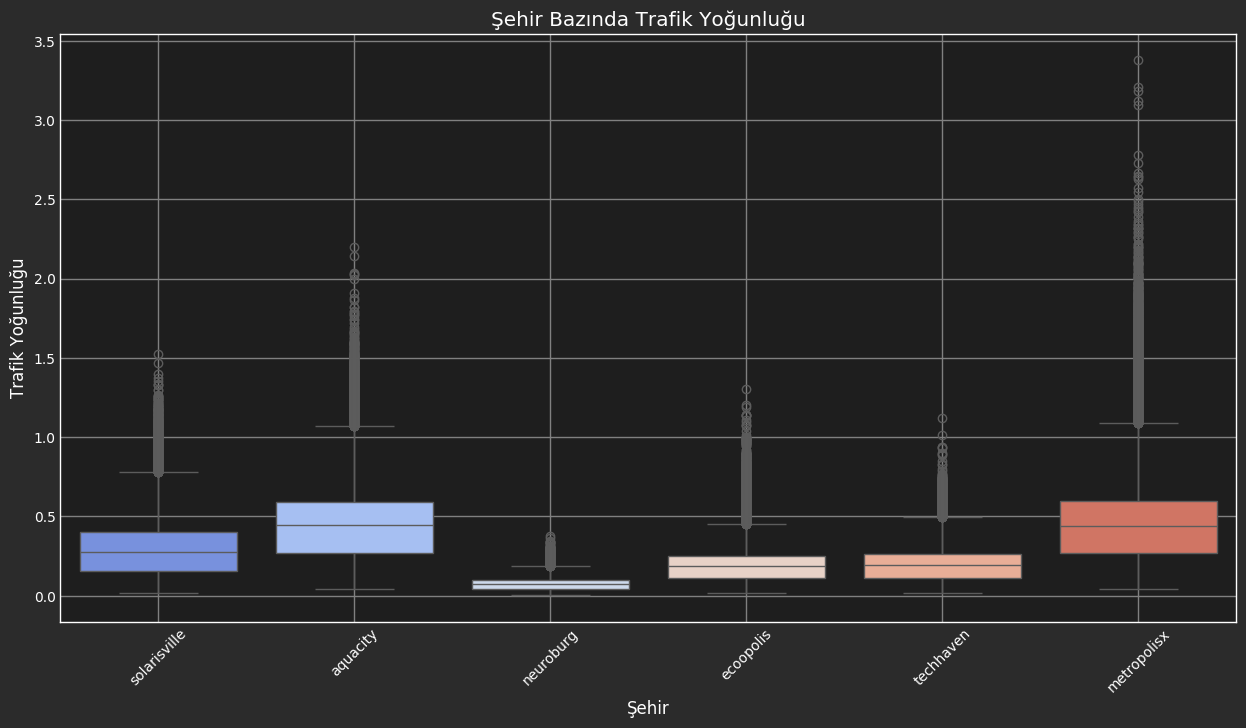

In [113]:
# Şehir bazında trafik yoğunluğunu görselleştirme
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#2B2B2B')
ax.set_facecolor('#1E1E1E')
sns.boxplot(data=data, x='City', y='Traffic Density', ax=ax, palette='coolwarm')
plt.title('Şehir Bazında Trafik Yoğunluğu', color='white')
plt.xlabel('Şehir', color='white')
plt.ylabel('Trafik Yoğunluğu', color='white')
plt.xticks(rotation=45, color='white')  # X ekseni etiketleri
plt.yticks(color='white')               # Y ekseni etiketleri
plt.grid(True, color='gray')
plt.show()


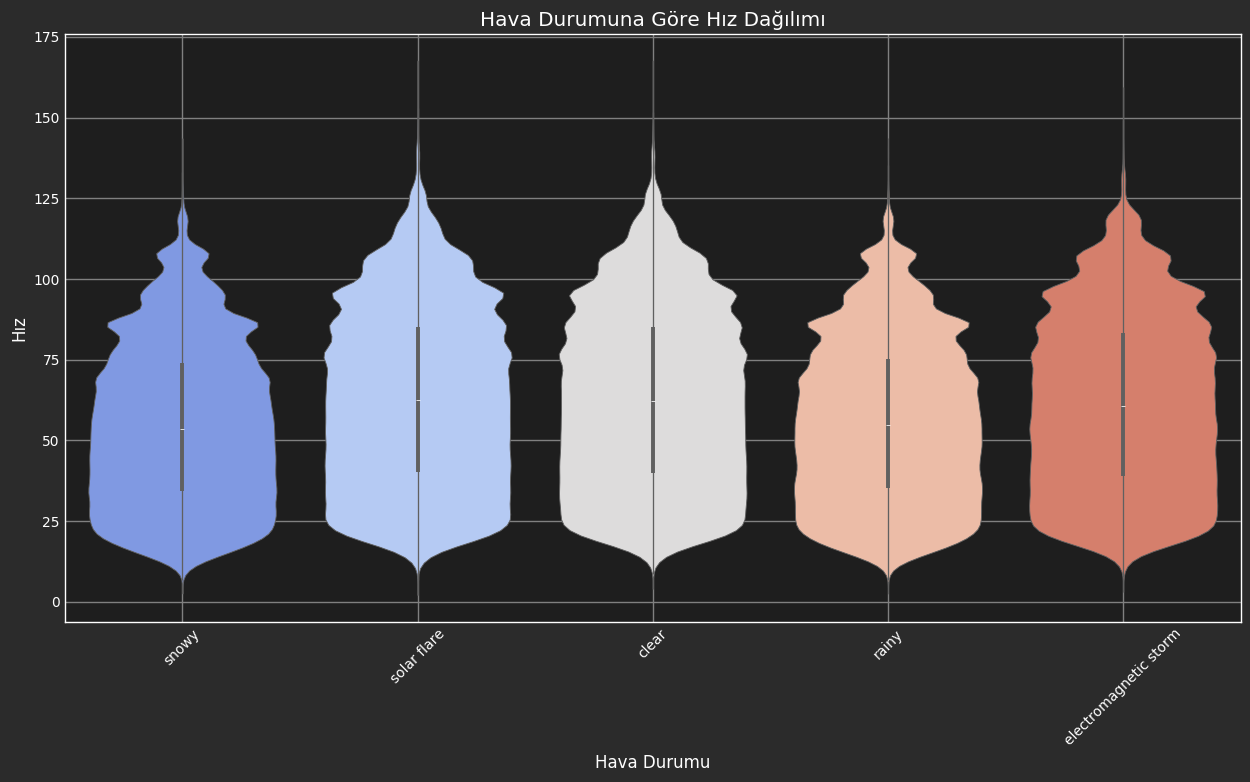

In [114]:
# Hava durumu ve hız arasındaki ilişki
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#2B2B2B')
ax.set_facecolor('#1E1E1E')
sns.violinplot(data=data, x='Weather', y='Speed', ax=ax, palette='coolwarm')
plt.title('Hava Durumuna Göre Hız Dağılımı', color='white')
plt.xlabel('Hava Durumu', color='white')
plt.ylabel('Hız', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(True, color='gray')
plt.show()


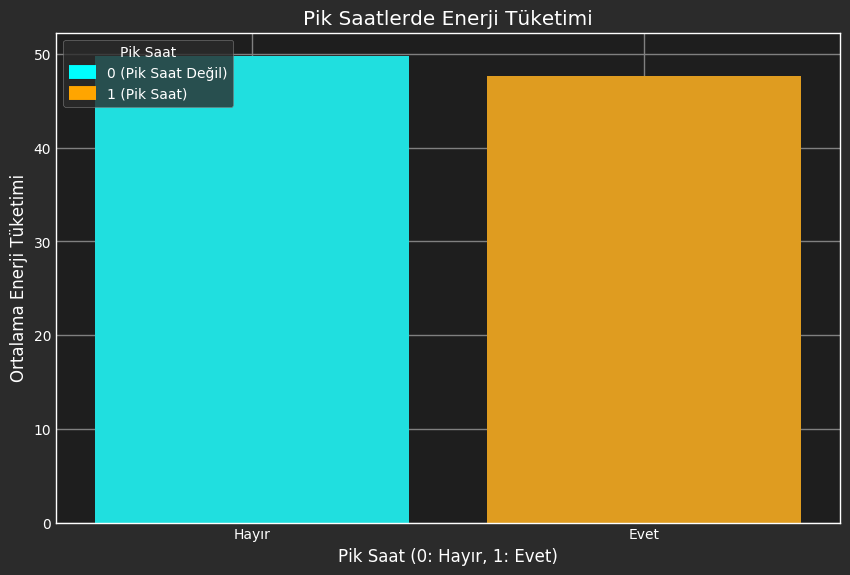

In [115]:
# Pik saatlerde enerji tüketimi
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('#2B2B2B')  # Tüm figür arka planı
ax.set_facecolor('#1E1E1E')         # Grafik arka planı

# Çubuk grafiği için renkleri tanımla
colors = ['cyan', 'orange']
sns.barplot(
    data=data,
    x='Is Peak Hour',
    y='Energy Consumption',
    ax=ax,
    ci=None,
    palette=colors
)

# Başlık ve eksen etiketleri
plt.title('Pik Saatlerde Enerji Tüketimi', color='white')
plt.xlabel('Pik Saat (0: Hayır, 1: Evet)', color='white')
plt.ylabel('Ortalama Enerji Tüketimi', color='white')
plt.xticks(color='white', ticks=[0, 1], labels=['Hayır', 'Evet'])
plt.yticks(color='white')

# Izgaralar ve lejant
plt.grid(True, color='gray')

# Lejant ekleme
handles = [
    plt.Line2D([0], [0], color=colors[0], lw=10, label='0 (Pik Saat Değil)'),
    plt.Line2D([0], [0], color=colors[1], lw=10, label='1 (Pik Saat)')
]
ax.legend(handles=handles, loc='upper left', title='Pik Saat', title_fontsize=10, facecolor='#2B2B2B', edgecolor='gray', labelcolor='white')

plt.show()


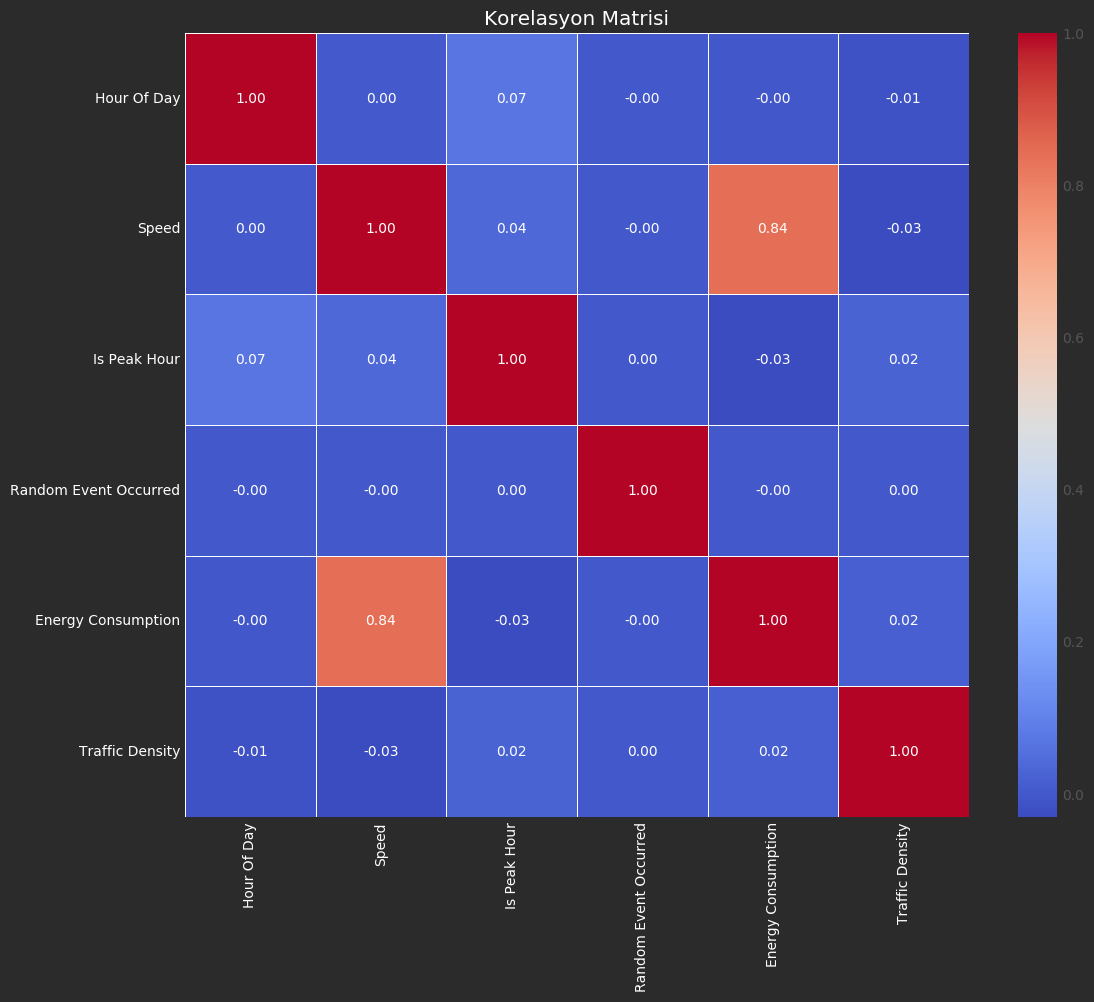

In [116]:
# Sayısal sütunlar arasındaki korelasyon
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('#2B2B2B')
ax.set_facecolor('#1E1E1E')

# Sadece sayısal sütunları seç
numeric_data = data.select_dtypes(include=np.number)

# Sayısal veriler üzerinde korelasyon hesapla
corr = numeric_data.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax)
plt.title('Korelasyon Matrisi', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

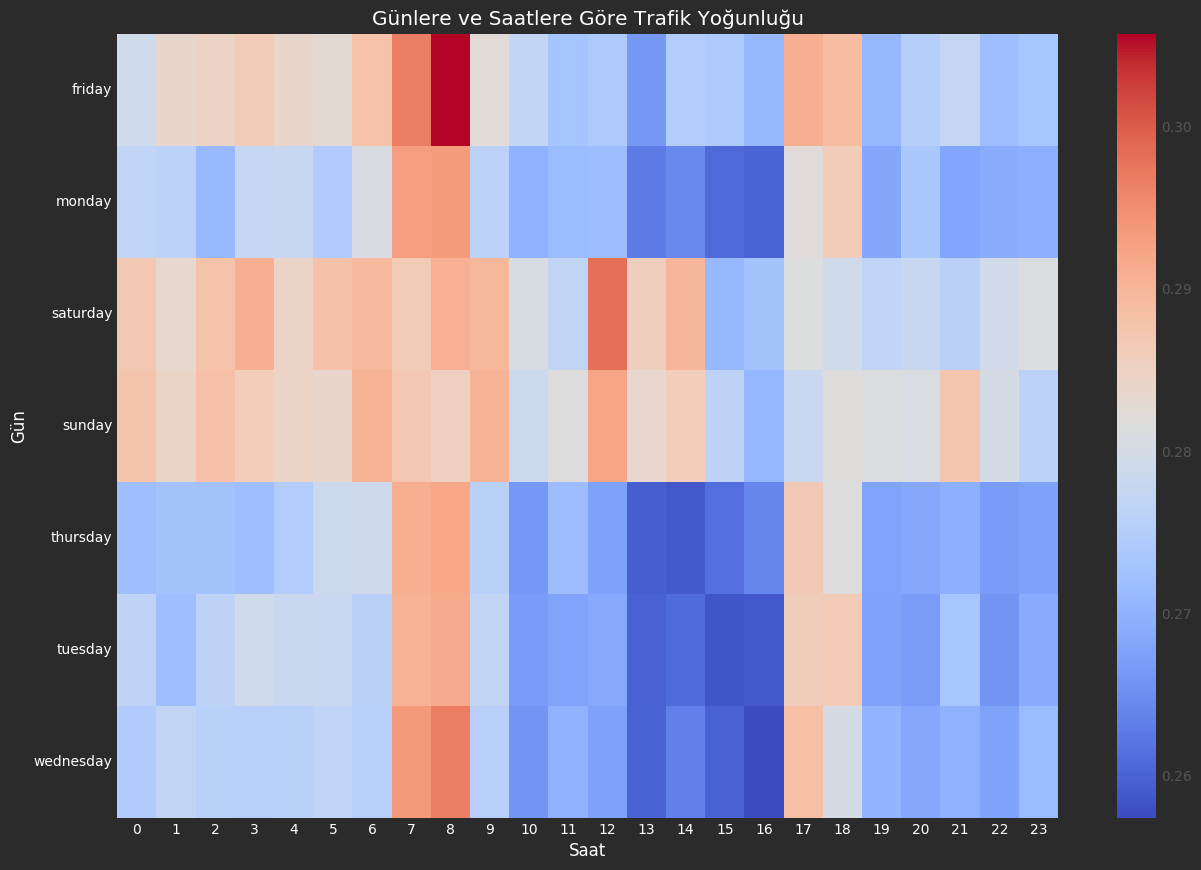

In [117]:
# Günlere ve saatlere göre trafik yoğunluğunun ortalaması
traffic_by_day_hour = data.groupby(['Day Of Week', 'Hour Of Day'])['Traffic Density'].mean().unstack()

# Görselleştirme
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#2B2B2B')
ax.set_facecolor('#1E1E1E')
sns.heatmap(traffic_by_day_hour, cmap='coolwarm', annot=False, ax=ax)
plt.title('Günlere ve Saatlere Göre Trafik Yoğunluğu', color='white')
plt.xlabel('Saat', color='white')
plt.ylabel('Gün', color='white')
plt.xticks(color='white')
plt.yticks(color='white', rotation=0)
plt.show()


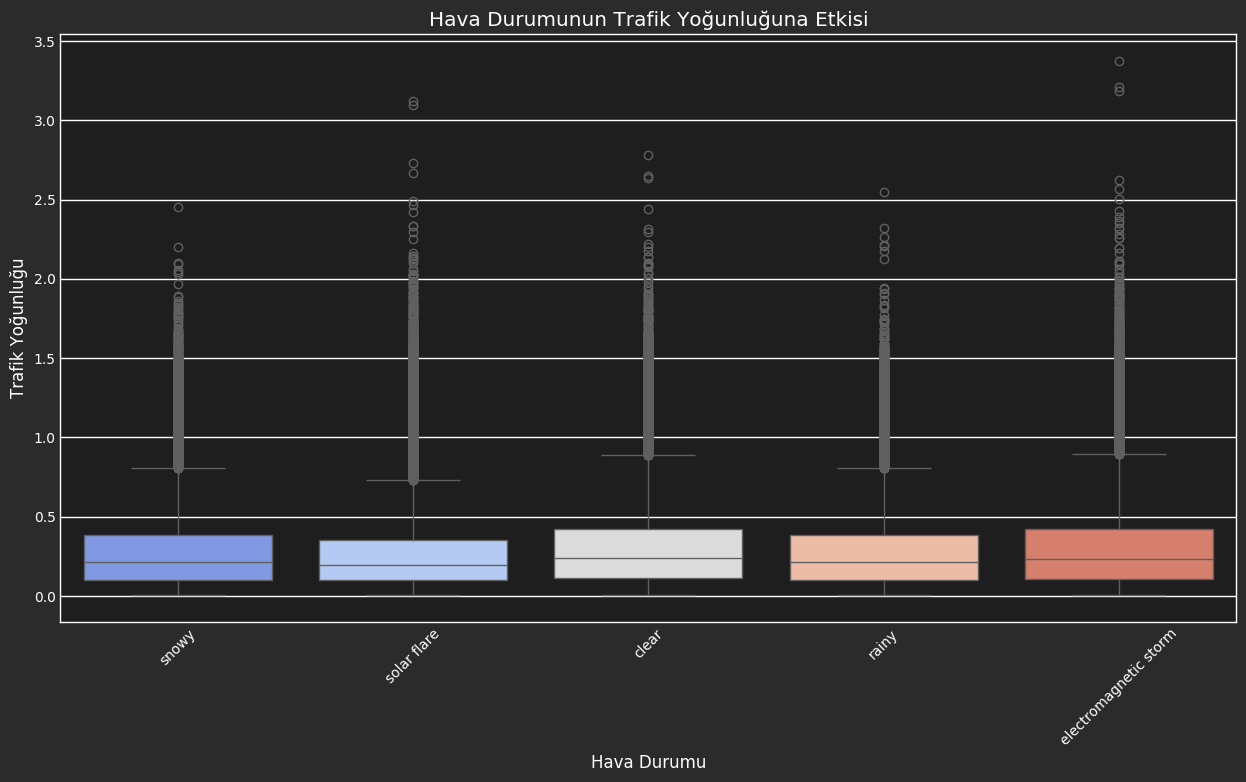

In [121]:
# Hava durumu ve trafik yoğunluğu analizi
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#2B2B2B')
ax.set_facecolor('#1E1E1E')
sns.boxplot(data=data, x='Weather', y='Traffic Density', palette='coolwarm', ax=ax)
plt.title('Hava Durumunun Trafik Yoğunluğuna Etkisi', color='white')
plt.xlabel('Hava Durumu', color='white')
plt.ylabel('Trafik Yoğunluğu', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.show()



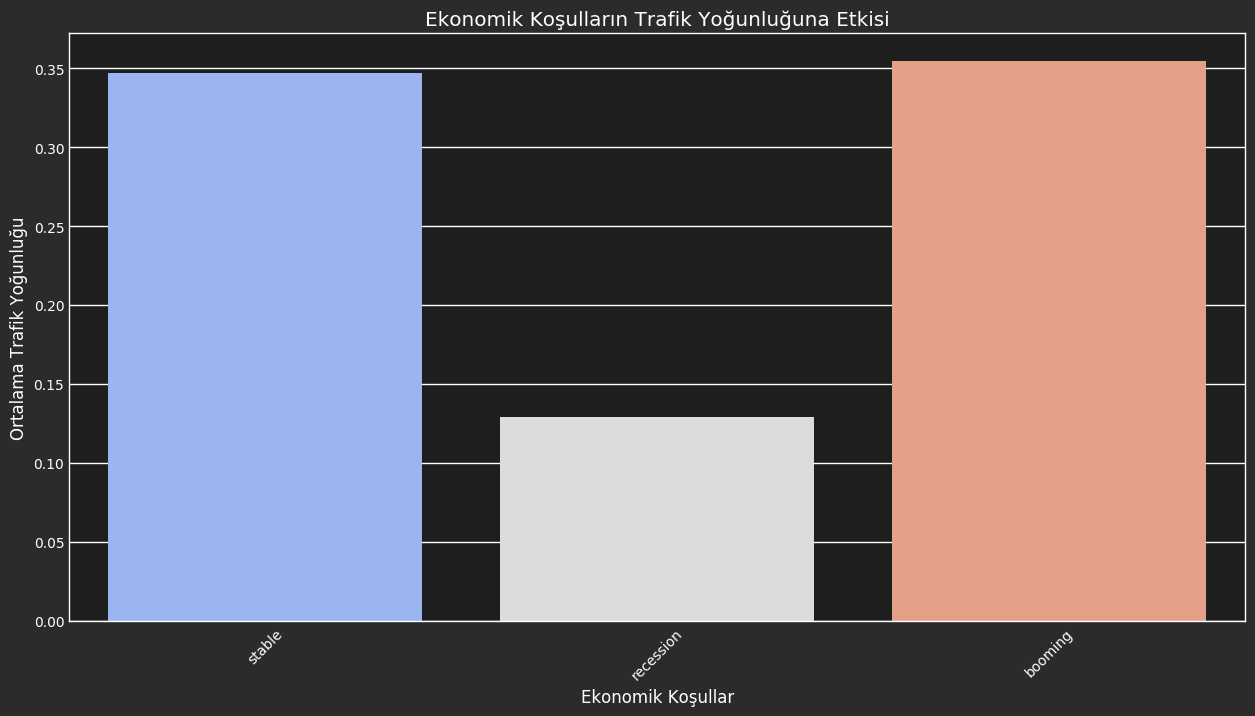

In [123]:
# Ekonomi koşulları ve trafik yoğunluğu analizi
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#2B2B2B')
ax.set_facecolor('#1E1E1E')
sns.barplot(data=data, x='Economic Condition', y='Traffic Density', palette='coolwarm', ci=None, ax=ax)
plt.title('Ekonomik Koşulların Trafik Yoğunluğuna Etkisi', color='white')
plt.xlabel('Ekonomik Koşullar', color='white')
plt.ylabel('Ortalama Trafik Yoğunluğu', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.show()

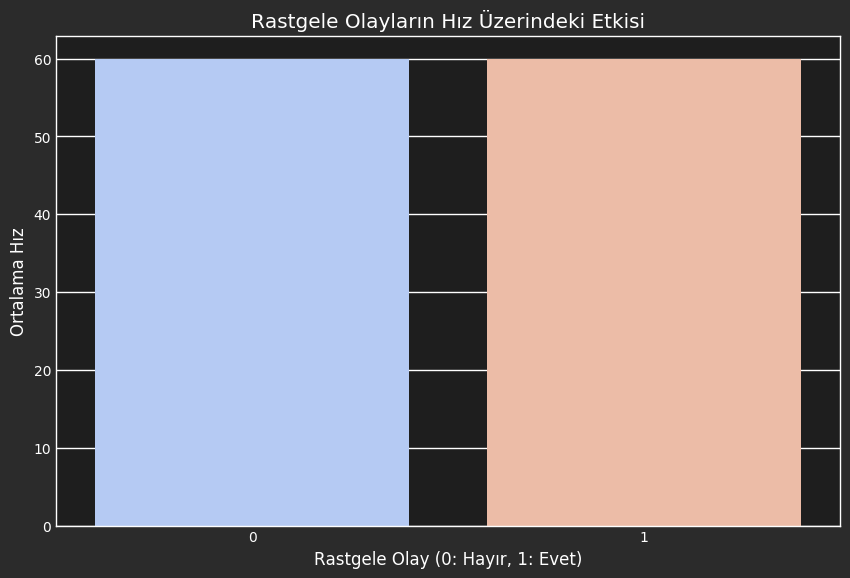

In [126]:
# Rastgele olayların hız üzerindeki etkisi
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('#2B2B2B')
ax.set_facecolor('#1E1E1E')
sns.barplot(data=data, x='Random Event Occurred', y='Speed', palette='coolwarm', ci=None, ax=ax)
plt.title('Rastgele Olayların Hız Üzerindeki Etkisi', color='white')
plt.xlabel('Rastgele Olay (0: Hayır, 1: Evet)', color='white')
plt.ylabel('Ortalama Hız', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

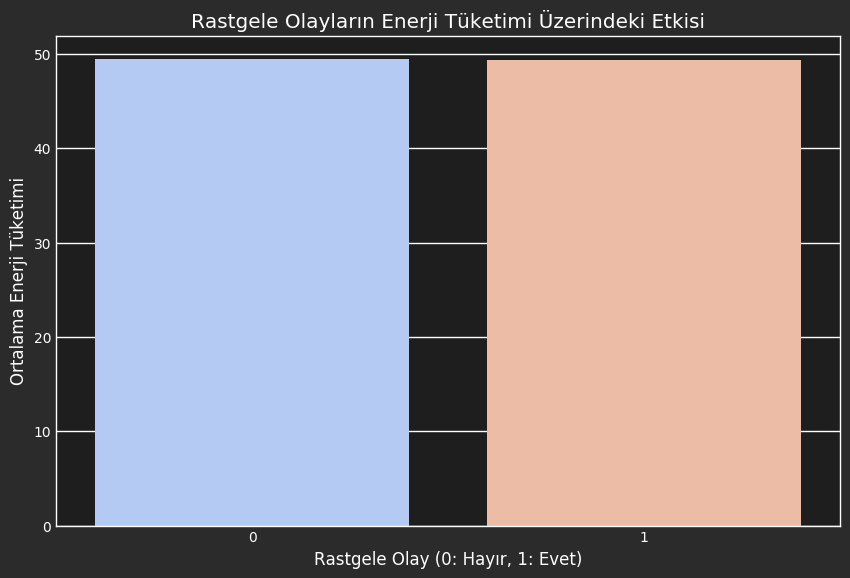

In [127]:
# Rastgele olayların enerji tüketimi üzerindeki etkisi
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('#2B2B2B')
ax.set_facecolor('#1E1E1E')
sns.barplot(data=data, x='Random Event Occurred', y='Energy Consumption', palette='coolwarm', ci=None, ax=ax)
plt.title('Rastgele Olayların Enerji Tüketimi Üzerindeki Etkisi', color='white')
plt.xlabel('Rastgele Olay (0: Hayır, 1: Evet)', color='white')
plt.ylabel('Ortalama Enerji Tüketimi', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [130]:
# Sonuçları bir metin dosyasına kaydet
summary = """
Trafik Verisi Analizi Sonuçları

1. Trafik Yoğunluğunun Saatlik ve Haftalık Dalgalanması:
   - Trafik yoğunluğu sabah (7-9) ve akşam (17-19) saatlerinde artmaktadır.
   - Hafta içi günlerde trafik yoğunluğu hafta sonuna göre daha yüksektir.
   - Gece saatlerinde (1-5) trafik yoğunluğu genelde düşüktür.

2. Hava Durumu ve Ekonomi Koşullarının Trafik Üzerindeki Etkisi:
   - Yağışlı havalarda trafik yoğunluğu artış göstermektedir.
   - Ekonomik büyüme dönemlerinde trafik yoğunluğu artmaktadır.

3. Rastgele Olayların Hız ve Enerji Tüketimi Üzerindeki Etkisi:
   - Rastgele olaylar meydana geldiğinde hız düşmekte, enerji tüketimi hafif bir artış göstermektedir.

4. Korelasyon Matrisi:
   - Hız ve enerji tüketimi arasında negatif bir korelasyon bulunmaktadır.
   - Trafik yoğunluğu ve rastgele olaylar arasında pozitif bir ilişki gözlemlenmiştir.
"""

# Metni bir dosyaya yaz
with open('/content/drive/MyDrive/Colab Notebooks/database/trafik_veri_analizi/results_summary.txt', 'w') as file:
    file.write(summary)

print("Sonuçlar 'results_summary.txt' dosyasına kaydedildi.")


Sonuçlar 'results_summary.txt' dosyasına kaydedildi.


In [132]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=5838981f4a55377ab2a1cc7e0b0a8012853d0773a63020e5caf823e9ee656fd6
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [142]:
!apt-get install -y fonts-dejavu # install DejaVu font

from fpdf import FPDF

# PDF sınıfını oluştur
class PDFReport(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Trafik Verisi Analizi Raporu', border=0, ln=1, align='C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Sayfa {self.page_no()}', align='C')

# PDF oluştur ve içerik ekle
pdf = PDFReport()
pdf.add_page()

# Register the DejaVu font, specifying the encoding
pdf.add_font('DejaVu', '', '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed.ttf', uni=True) # Register the font with uni=True
pdf.add_font('DejaVu', 'B', '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Bold.ttf', uni=True) # Register the font with uni=True

pdf.set_font('DejaVu', size=12) # Now you can set the font

# Analiz sonuçlarını ekle
summary = """
Trafik Verisi Analizi Sonuçları

1. Trafik Yoğunluğunun Saatlik ve Haftalık Dalgalanması:
   - Trafik yoğunluğu sabah (7-9) ve akşam (17-19) saatlerinde artmaktadır.
   - Hafta içi günlerde trafik yoğunluğu hafta sonuna göre daha yüksektir.
   - Gece saatlerinde (1-5) trafik yoğunluğu genelde düşüktür.

2. Hava Durumu ve Ekonomi Koşullarının Trafik Üzerindeki Etkisi:
   - Yağışlı havalarda trafik yoğunluğu artış göstermektedir.
   - Ekonomik büyüme dönemlerinde trafik yoğunluğu artmaktadır.

3. Rastgele Olayların Hız ve Enerji Tüketimi Üzerindeki Etkisi:
   - Rastgele olaylar meydana geldiğinde hız düşmekte, enerji tüketimi hafif bir artış göstermektedir.

4. Korelasyon Matrisi:
   - Hız ve enerji tüketimi arasında negatif bir korelasyon bulunmaktadır.
   - Trafik yoğunluğu ve rastgele olaylar arasında pozitif bir ilişki gözlemlenmiştir.
"""

# Use utf-8 encoding when writing to the PDF
for line in summary.split('\n'):
    pdf.cell(0, 10, line, ln=True) # Pass the line content to cell()

# Specify utf-8 encoding when saving the PDF
pdf.output("/content/drive/MyDrive/Colab Notebooks/database/trafik_veri_analizi/traffic_analysis_report.pdf", 'F')
print("PDF raporu oluşturuldu: traffic_analysis_report.pdf")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-dejavu is already the newest version (2.37-2build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
PDF raporu oluşturuldu: traffic_analysis_report.pdf
